<a href="https://colab.research.google.com/github/PriyankaRaii/Python_Projects/blob/main/Computer_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd

In [83]:
path='/content/drive/MyDrive/Colab Notebooks/python Datasets /ComputerPricesData.csv'
ComputerPricesData=pd.read_csv(path)
ComputerPricesData.head(5)

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


**Data description**

* price: The Price of the computer
* speed: The speed
* hd: How much hard drive is present
* ram: How much ram is present in the computer
* screen: The screen size
* cd: Whether CD player is present or not
* multi: Are there multiple ports or not
* premium: If the computer premium quality
* ads: The ads value of the computer
* trend: The trend value of the computer

In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
import pandas as pd
import numpy as np
print('Shape before deleting duplicate values:', ComputerPricesData.shape)
ComputerPricesData=ComputerPricesData.drop_duplicates()
print('Shape After deleting duplicate values:', ComputerPricesData.shape)

Shape before deleting duplicate values: (6259, 10)
Shape After deleting duplicate values: (6183, 10)


In [86]:
ComputerPricesData.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


**Defining the problem statement:**

Create an ML model that can predict the appropriate price of a computer

1.  **Target Variable**:price
2.  **Predictors:** RAM, HDD, CD, ports etc.


### **Base on the problem statement we create supervised ML Regression model, as the target variable is Continuous.**

 We will see its distribution Target variable that is **price**

<Axes: >

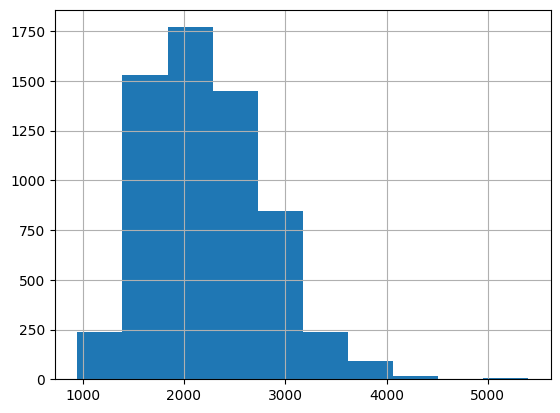

In [87]:
%matplotlib inline
ComputerPricesData['price'].hist()


In [88]:
filtered_data = ComputerPricesData[ComputerPricesData['price'] >= 5000]
filtered_data

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
1506,5399,66,1200,32,17,yes,no,yes,283,10
1991,5399,66,1200,32,17,yes,no,yes,259,11
2096,5399,66,1200,32,17,yes,no,yes,275,12


The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

**Basic Data Exploration**



In [89]:
ComputerPricesData.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [90]:
ComputerPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6183 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6183 non-null   int64 
 1   speed    6183 non-null   int64 
 2   hd       6183 non-null   int64 
 3   ram      6183 non-null   int64 
 4   screen   6183 non-null   int64 
 5   cd       6183 non-null   object
 6   multi    6183 non-null   object
 7   premium  6183 non-null   object
 8   ads      6183 non-null   int64 
 9   trend    6183 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 531.4+ KB


In [91]:
ComputerPricesData.describe()

,price,speed,hd,ram,screen,ads,trend
count,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000
mean,2221.837943,52.129549,417.760796,8.305353,14.614265,220.906033,15.944364
std,582.042129,21.190655,259.458342,5.649178,0.907304,74.958628,7.903073
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.000000,10.000000
50%,2145.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,22.000000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [92]:
ComputerPricesData.nunique()

price      808
speed        6
hd          59
ram          6
screen       3
cd           2
multi        2
premium      2
ads         34
trend       35
dtype: int64

**Basic Data Exploration Results**

The selected columns in this step are not final, further study will be done and then a final list will be created

---



1. price: Continuous. Selected.This is the Target Variable!
2. speed: Continuous. Selected
3. hd: Continuous. Selected
4. ram: Categorical. Selected
5. screen: Categorical. Selected
6. cd: Categorical. Selected
7. multi: Categorical. Selected
8. premium: Categorical. Selected
9. ads: Continuous. Selected
10. trend: Continuous. Selected


**There are no qualitative columns in this data**

**Visual Exploratory Data Analysis**

1. Categorical variables: Bar plot
2. Continuous variables: Histogram

In [93]:
def PlotBarCharts(inpData, colsToPlot):

  %matplotlib inline
  import matplotlib.pyplot as plt

  fig,subPlot=plt.subplots(nrows=1,ncols=len(colsToPlot), figsize=(20,5))
  fig.suptitle('Bar charts of :' + str((colsToPlot)))
  for colname, plotnumber in zip(colsToPlot, range(len((colsToPlot)))):
    inpData.groupby(colname).size().plot(kind='bar',ax=subPlot[plotnumber])


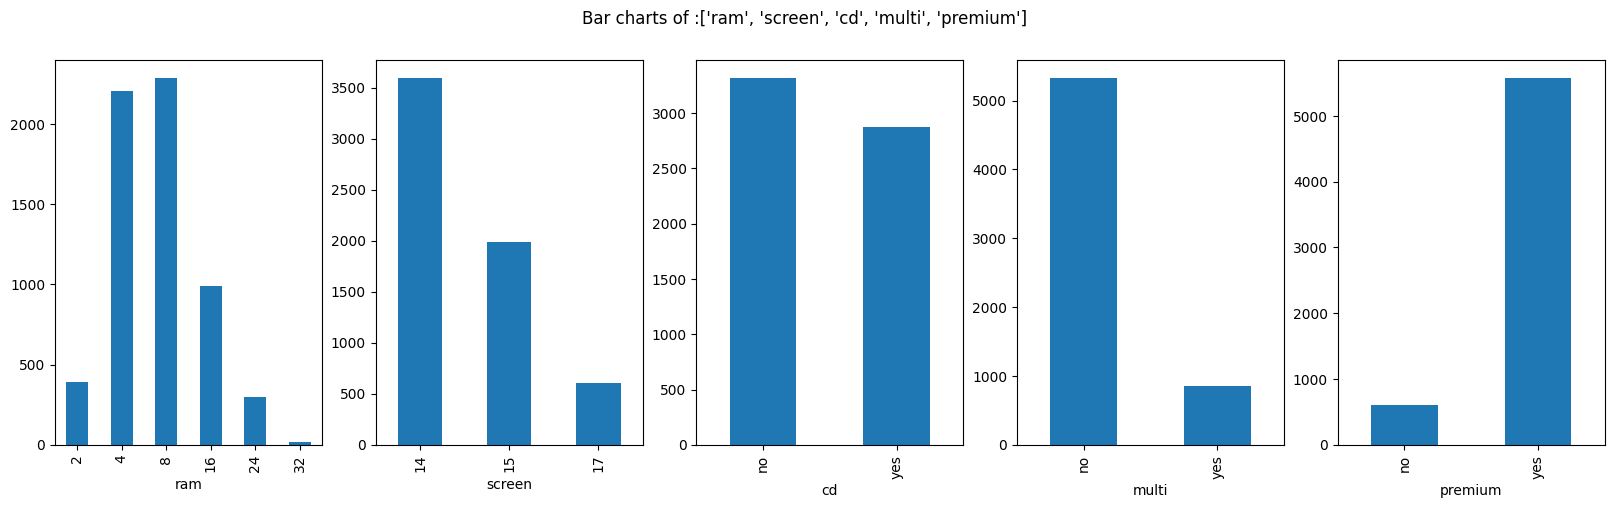

In [94]:
PlotBarCharts(inpData=ComputerPricesData, colsToPlot=['ram', 'screen', 'cd', 'multi','premium'])

**Selected Categorical Variables:** All the categorical variables are selected for further analysis.

'ram', 'screen', 'cd', 'multi','premium'

**Visualize distribution of all the Continuous Predictor variables in the data using histograms**

array([[<Axes: title={'center': 'speed'}>,
        <Axes: title={'center': 'hd'}>],
       [<Axes: title={'center': 'ads'}>,
        <Axes: title={'center': 'trend'}>]], dtype=object)

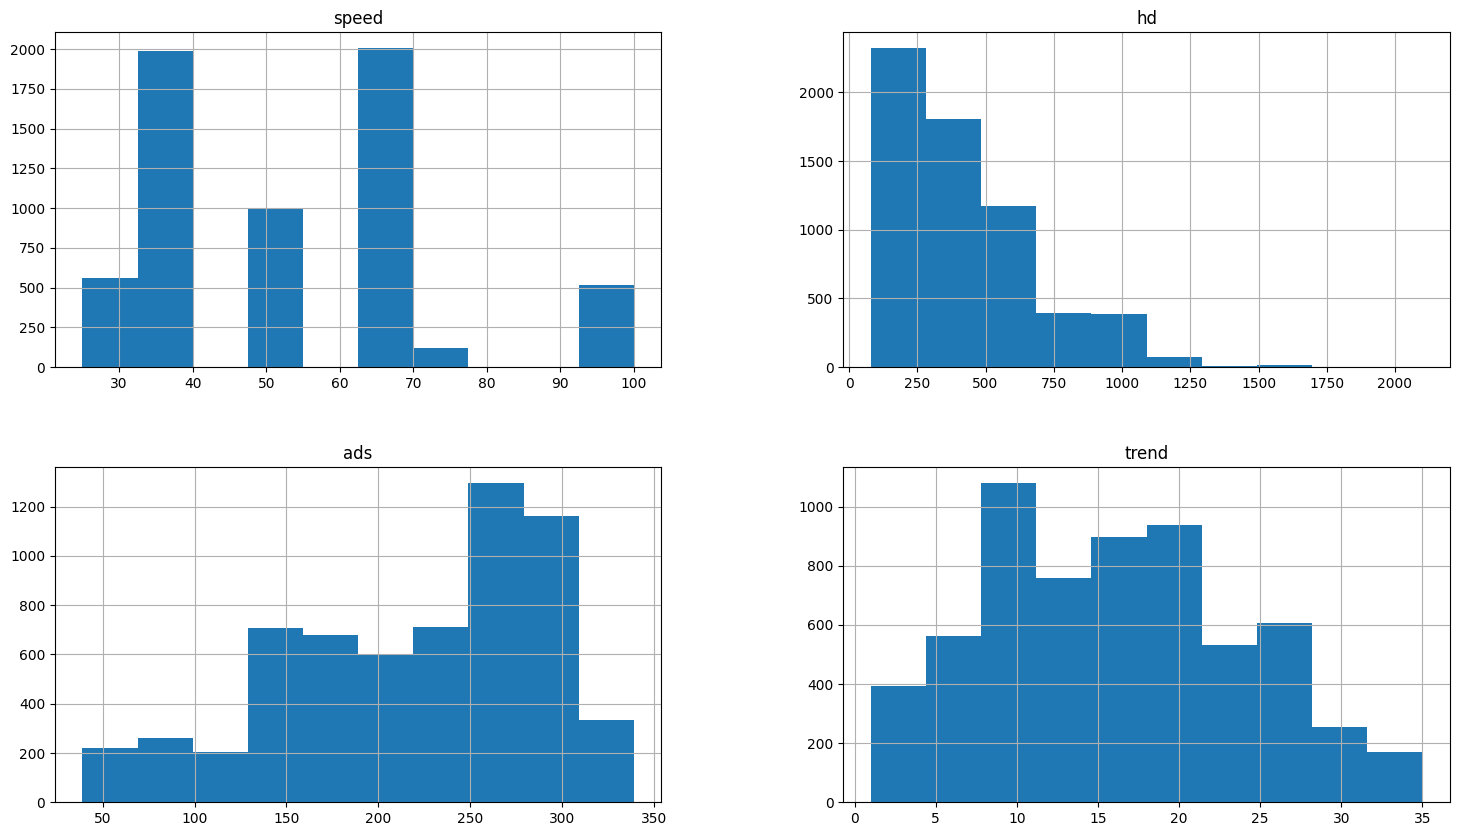

In [95]:
ComputerPricesData.hist(['speed','hd','ads','trend'],figsize=(18,10))

**Histogram Interpretation**

**Selected Continuous Variables:**
1. ads : Selected. The distribution is good.
2. hd: Selected. The distribution is good.
3. speed: Selected. The distribution is good.
4. trend: Selected. The distribution is good.

**Outlier treatment**
In this data no prominent outliers are present, hence, not treating outlier in this section

### **Missing values treatment**



In [96]:
ComputerPricesData.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64

There is no missing values in this data

### **Feature Selection**

**Visual exploration of relationship between variables**

Continuous Vs Continuous ---- Scatter Plot

Categorical Vs Continuous---- Box Plot

Categorical Vs Categorical---- Grouped Bar Plots

**Statistical measurement of relationship strength between variables**

Continuous Vs Continuous ---- Correlation matrix

Categorical Vs Continuous---- ANOVA test

**Categorical Vs Categorical--- Chi-Square test**

In this case study the Target variable is Continuous, hence below two
scenarios will be present

Continuous Target Variable Vs Continuous Predictor

Continuous Target Variable Vs Categorical Predictor

### **Continuous Vs Continuous -- Scatter Charts**

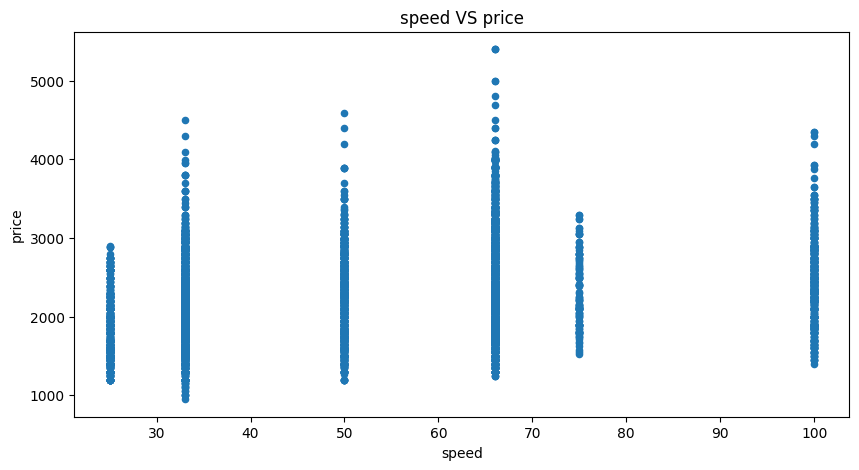

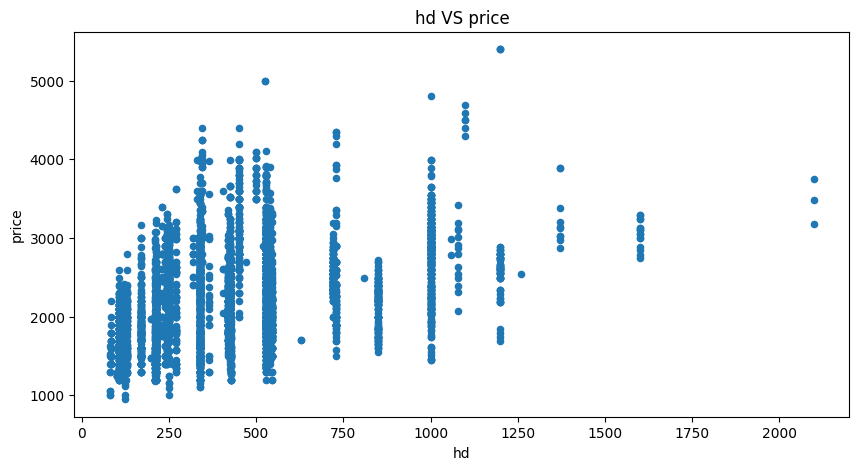

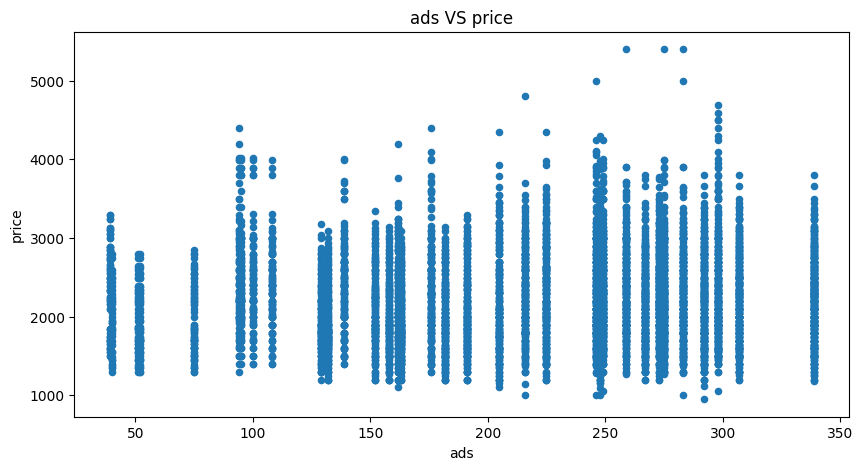

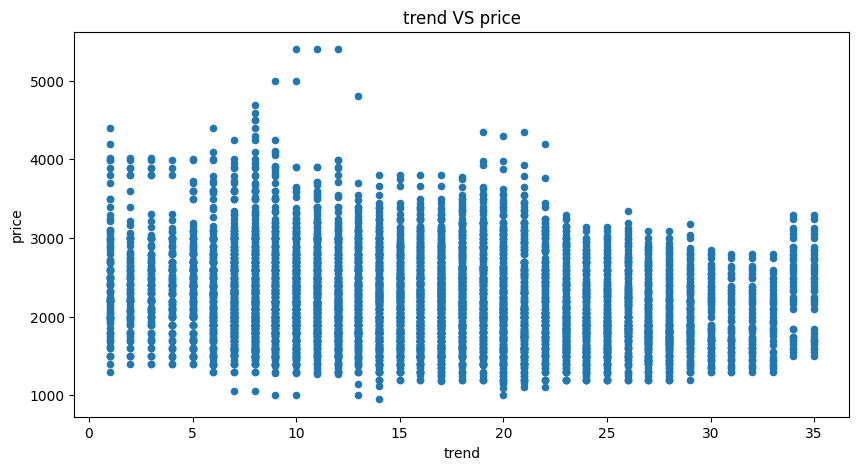

In [97]:
ContinuousCols=['speed','hd','ads','trend']

for predictor in ContinuousCols:
  ComputerPricesData.plot.scatter(x=predictor,y='price',figsize=(10,5),title=predictor+" VS "+ 'price')


### **Scatter charts interpretation**

Trend. There could be three scenarios

**Increasing Trend:** This means both variables are positively correlated.They are directly proportional to each other, if one value increases, other also increases. This is good for ML!

**Decreasing Trend:** This means both variables are negatively correlated. They are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

**No Trend:** You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value.
Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

Pearson's correlation coefficient can simply be calculated as the covariance between two features  x and  y  (numerator) divided by the product of their standard deviations (denominator)

This value can be calculated only between two numeric columns

**Correlation between [-1,0)** means inversely proportional, the scatter plot will show a downward trend

**Correlation between (0,1]** means directly proportional, the scatter plot will show a upward trend

**Correlation near {0}** means No relationship, the scatter plot will show no clear trend.

If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter

We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question


In [98]:
ContinuousCols=['price','speed','hd','ads','trend']

CorrelationData=ComputerPricesData[ContinuousCols].corr()
CorrelationData

,price,speed,hd,ads,trend
price,1.000000,0.298515,0.428845,0.056434,-0.201662
speed,0.298515,1.000000,0.370356,-0.214349,0.404830
hd,0.428845,0.370356,1.000000,-0.323342,0.577599
ads,0.056434,-0.214349,-0.323342,1.000000,-0.320626
trend,-0.201662,0.404830,0.577599,-0.320626,1.000000


In [99]:
CorrelationData['price'][abs(CorrelationData['price']) > 0.2 ]

price    1.000000
speed    0.298515
hd       0.428845
trend   -0.201662
Name: price, dtype: float64

Final selected Continuous columns:

'speed','hd','trend'

**Relationship exploration: Categorical Vs Continuous -- Box Plots**

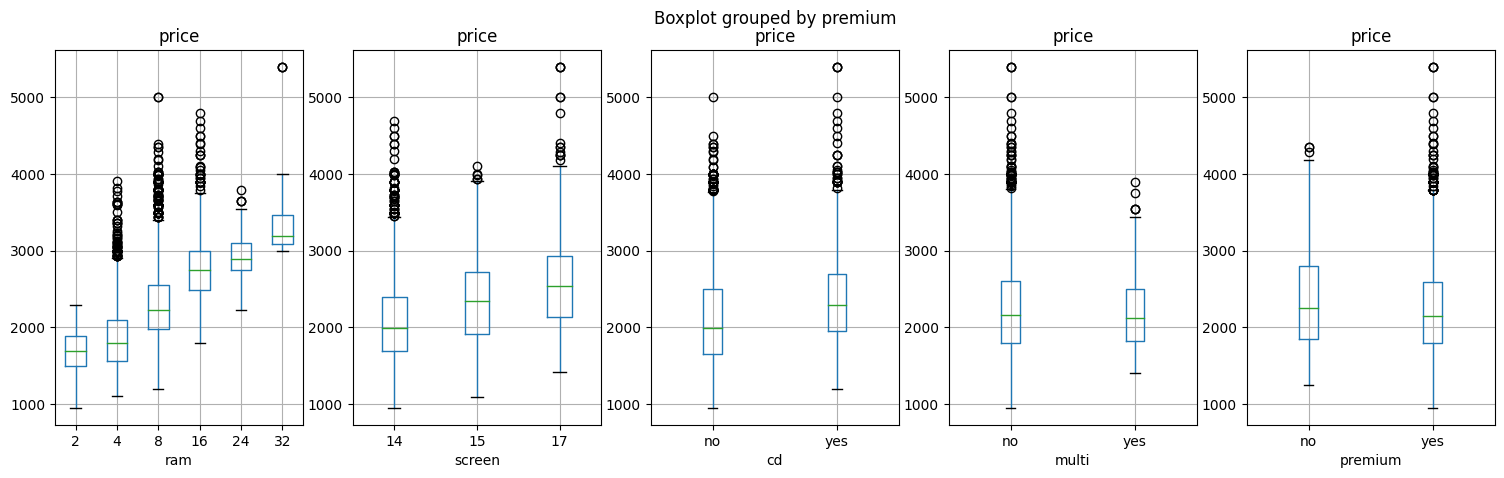

In [100]:
CategoricalColsList=['ram', 'screen', 'cd', 'multi','premium']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    ComputerPricesData.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

### **Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**


In [101]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [102]:
CategoricalPredictorList=['ram', 'screen', 'cd', 'multi','premium']
FunctionAnova(inpData=ComputerPricesData,
              TargetVariable='price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

ram is correlated with price | P-Value: 0.0
screen is correlated with price | P-Value: 1.2830206408407136e-129
cd is correlated with price | P-Value: 8.113565801487017e-55
multi is NOT correlated with price | P-Value: 0.19076936432204794
premium is correlated with price | P-Value: 2.7969949437607514e-10


['ram', 'screen', 'cd', 'premium']

Based on the above tests, selecting the final columns for machine learning

In [200]:
SelectedColumns=['speed','hd','trend','ram', 'screen', 'cd','premium']
DataForML=ComputerPricesData[SelectedColumns]
DataForML.head()

,speed,hd,trend,ram,screen,cd,premium
0,25,80,1,4,14,no,yes
1,33,85,1,2,14,no,yes
2,25,170,1,4,15,no,yes
3,25,170,1,8,14,no,no
4,33,340,1,16,14,no,yes


In [201]:
DataForML.to_pickle('DataForML.pkl')

In [202]:
DataForML['cd'].replace({'no':0, 'yes':1}, inplace=True)

In [191]:
DataForML_Numeric=pd.get_dummies(DataForML)

DataForML_Numeric['price']=ComputerPricesData['price']

DataForML_Numeric.head()

,speed,hd,trend,ram,screen,cd,premium_no,premium_yes,price
0,25,80,1,4,14,0,0,1,1499
1,33,85,1,2,14,0,0,1,1795
2,25,170,1,4,15,0,0,1,1595
3,25,170,1,8,14,0,1,0,1849
4,33,340,1,16,14,0,0,1,3295


We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [203]:
DataForML_Numeric.columns

Index(['speed', 'hd', 'trend', 'ram', 'screen', 'cd', 'premium_no',
       'premium_yes', 'price'],
      dtype='object')

In [204]:
TargetVariable='price'
Predictors=['speed', 'hd', 'trend', 'ram', 'screen', 'cd','premium_no','premium_yes']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


In [205]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4328, 8)
(4328,)
(1855, 8)
(1855,)


## **Multiple Linear Regression**

In [206]:
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

print(RegModel)

LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))

    return(100-MAPE)


from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)


from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.7714329190590467

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   2595          2633.0
1   2744          2557.0
2   2549          2541.0
3   2365          2616.0
4   1299          1194.0
Mean Accuracy on test data: 89.90297657061701
Median Accuracy on test data: 91.97132616487455

Accuracy values for 10-fold Cross Validation:
 [86.25794432 87.50348066 89.56671953 88.36697612 91.01667583 91.95822707
 91.73501234 90.74300352 89.8634562  87.04312012]

Final Average Accuracy of the model: 89.41


## **Decision Trees**

DecisionTreeRegressor(max_depth=12)
R2 Value: 0.9556178320477757

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   2595          2504.0
1   2744          2601.0
2   2549          2516.0
3   2365          1975.0
4   1299          1278.0
Mean Accuracy on test data: 93.45388527978345
Median Accuracy on test data: 95.22594752186589

Accuracy values for 10-fold Cross Validation:
 [87.75015111 93.27622868 94.01376133 90.63947541 91.86578905 92.97452362
 91.78899266 92.70512235 93.34373389 87.3093109 ]

Final Average Accuracy of the model: 91.57


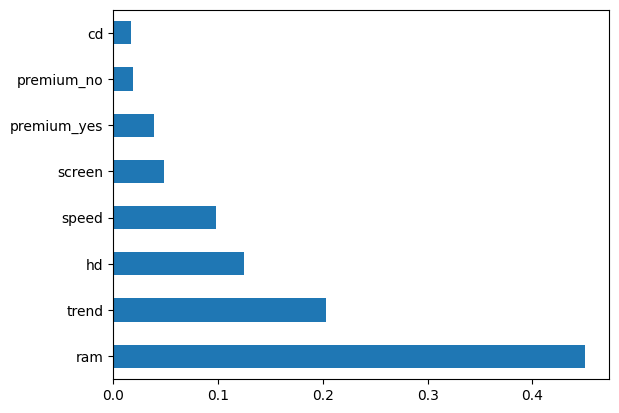

In [207]:
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=12,criterion='squared_error')

print(RegModel)

DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)


from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)


from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


## **Plotting a Decision Tree**

In [208]:
!pip install graphviz

In [209]:
!pip install pydotplus

In [210]:
import shutil
dot_executable = shutil.which('dot')
print(dot_executable)

/usr/bin/dot


In [114]:

import os
os.environ["PATH"] += os.pathsep + '/usr/bin/dot'

In [211]:
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5)
RegModel.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

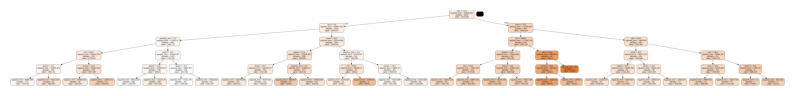

In [212]:
from IPython.display import Image
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt

dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable, filled=True, rounded=True)


graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png("decision_tree.png")

plt.figure(figsize=(10, 10))
plt.imshow(plt.imread("decision_tree.png"))
plt.axis('off')
plt.show()

## **Deployment of the Model**


In [213]:
TargetVariable='price'

Predictors=['trend', 'hd', 'speed', 'ram','screen','premium_no','premium_yes']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

print(X.shape)
print(y.shape)

(6183, 7)
(6183,)


**Cross validating the final model accuracy with less predictors**


In [214]:
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=13)

Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))



Accuracy values for 10-fold Cross Validation:
 [89.65823046 92.40449649 93.7579177  89.72173826 91.79148656 93.1007873
 91.79996473 91.55588324 92.49262602 84.22587311]

Final Average Accuracy of the model: 91.05


Retraining the model using 100% data

In [215]:
Final_DTR_Model=RegModel.fit(X,y)

In [216]:
import pickle
import os

with open('Final_DTR_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_DTR_Model, fileWriteStream)
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


Create a python function

In [226]:
def FunctionPredictResult(InputData):
    import pandas as pd
    import os

    Num_Inputs = InputData.shape[0]

    DataForML = pd.read_pickle('DataForML.pkl')
    InputData = InputData.append(DataForML)

    InputData = pd.get_dummies(InputData)

    Predictors = ['trend', 'hd', 'speed', 'ram','screen','premium_no','premium_yes']

    X = InputData[Predictors].values[0:Num_Inputs]

    script_directory = os.path.abspath('/content')

    pickle_file_path = os.path.join(script_directory, 'Final_DTR_Model.pkl')

    with open(pickle_file_path, 'rb') as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)

    Prediction = PredictionModel.predict(X)
    PredictionResult = pd.DataFrame(Prediction, columns=['Prediction'])
    return round(PredictionResult)


In [227]:
NewSampleData=pd.DataFrame(
data=[[1,80,14,4,14,0],
     [1,170,14,4,15,0]],
columns=['trend', 'hd', 'speed', 'ram','screen','premium'])

print(NewSampleData)

FunctionPredictResult(InputData= NewSampleData)

   trend   hd  speed  ram  screen  premium
0      1   80     14    4      14        0
1      1  170     14    4      15        0


,Prediction
0,1650.0
1,2249.0
